<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

http://www.alexsalo.xyz/weighted-linear-regression-python/

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [10]:
#weighted linear regression
def wls(x, y, tau=0.3):
    """
    :param x: feature matrix
    :param y: target vector
    :param tau: smoothing factor - Gaussian bump's width
    :return: plot of matplotlib
    """
    x = np.mat(x).T
    y = np.mat(y).T
    m = x.shape[0] #number of examples

    dummy = np.mat(np.ones((m,), dtype=np.int))
    X = np.hstack((dummy.T, x)) #design matrix

    #try predicting on new possible examples
    xpred = np.linspace(x.min(), x.max(), 200)
    ypred = np.zeros(200)

    for i in range(len(xpred)):
        xval = xpred[i]

        W = np.eye(m) #weights for current ith example
        theta = np.zeros(m) #thetas for that

        #fill weights via Gaussian sigmoid
        for j in range(m):
            W[j][j] = np.exp(-np.linalg.norm(x[j] - xval)**2 / 2*tau**2)

        #calc theta
        theta = np.linalg.inv(X.T * W * X) * (X.T * (W*y))

        #make prediction
        ypred[i] = np.mat([1, xval]) * theta

    plt.plot(x, y, 'ro', xpred, ypred, 'b-')
    plt.show()
    return plt

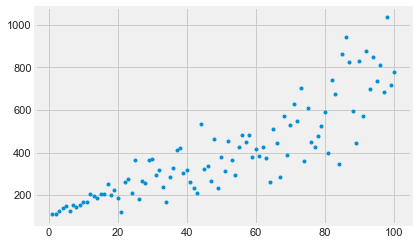

In [11]:
np.random.seed(0)
x = np.arange(1,101)
y = x * 5 + 100 + np.random.normal(x,2*x,100)
plt.plot(x,y,'.')

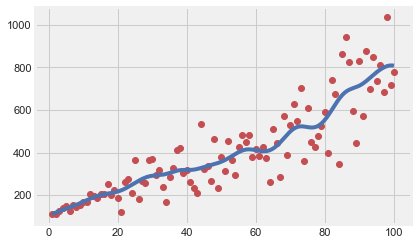

<module 'matplotlib.pyplot' from '/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [12]:
wls(x, y)